In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import datasets
import pandas as pd

In [2]:
def convert_labels(x):
    y = []
    for i in range(len(x)):
        y.append([(199.7-0.7*x[i][0])/199])
        # y.append([201-x[i][0]])
    return np.array(y)

In [4]:
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataX.head()
m = len(dataX) # Number of  examples
X = np.array(dataX)

dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY.head()
Y = np.array(dataY)
Y = convert_labels(Y)
Y.tofile('datasets/hitscore.csv',sep=',')
print(Y)

[[1.        ]
 [0.99648241]
 [0.99296482]
 ...
 [0.48291457]
 [0.3281407 ]
 [0.31758794]]


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10)
temp__ = 0.0000001
alphas1 = []
alphas2 = []
for i in range(0, 102):
    alphas1.append(temp__+ 0.00001)
    alphas2.append(temp__+ 0.00001)
    temp__ +=0.0001
res = []
res2 = []
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = Lasso()
    model2 = Ridge()

    # Lasso Implementation
    grid = dict()
    grid['alpha'] = alphas1
    grid_ = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas1))
    results = grid_.fit(X_train, y_train)

    # print('Alpha: %s' % results.best_estimator_.alpha)
    clf = Lasso(alpha=results.best_estimator_.alpha)
    clf.fit(X_train, y_train)
    predictY2 = clf.predict(X_test)
    res.append([results.best_estimator_.alpha,mean_squared_error(y_test, predictY2)])

    # Ridge Implementation
    grid2 = dict()
    grid2['alpha'] = alphas2
    grid2_ = GridSearchCV(estimator=model2,param_grid=dict(alpha=alphas2))
    results2 = grid2_.fit(X_train, y_train)

    clf2 = Ridge(alpha = results2.best_estimator_.alpha)
    clf2.fit(X_train,y_train)
    predictY22 = clf2.predict(X_test)
    res2.append([results2.best_estimator_.alpha,mean_squared_error(y_test, predictY22)])
    
    

In [17]:
res.sort(key = lambda x: x[0])
res2.sort(key = lambda x: x[0])
# print(res2)

total_rmse_lasso = 0
total_rmse_ridge = 0

for i in range(10):
    total_rmse_lasso += res[i][1]
    total_rmse_ridge += res2[i][1]

print("Average Lasso RMSE Error = ",str(total_rmse_lasso/10))
print("Average Ridge RMSE Error = ",str(total_rmse_ridge/10))

Average Lasso RMSE Error =  0.039358003318217885
Average Ridge RMSE Error =  0.039324488067932366


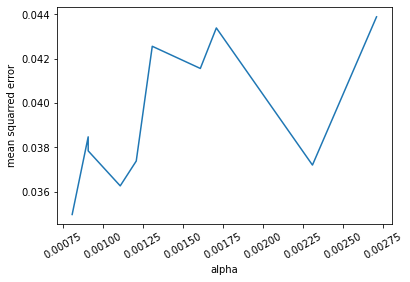

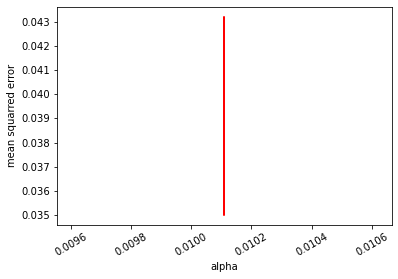

In [16]:
import matplotlib.pyplot as plt
plt.plot([i[0] for i in res], [i[1] for i in res])
plt.xlabel('alpha')
plt.ylabel('mean squarred error')
plt.xticks(rotation=30)
plt.show()

plt.figure()
plt.plot([i[0] for i in res2], [i[1] for i in res2],'r')
plt.xlabel('alpha')
plt.ylabel('mean squarred error')
plt.xticks(rotation=30)
plt.show()

The GridSearchCV in case of Ridge Regression return the same value of alpha for all folds, unlike in the case of Lasso Regression. However, the predicted values do vary over the different folds, with a minimum value of around 0.035 and max of around 0.44.

In [17]:
with open('L1.txt','w+') as f:
    f.write(str(res))

## Baseline Linear Regression

In [8]:
dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
Y = np.array(dataY)
Y = convert_labels(Y)
# Y.tofile('datasets/binary_labels.csv',sep=',')
print(Y)

[[1.        ]
 [0.99648241]
 [0.99296482]
 ...
 [0.48291457]
 [0.3281407 ]
 [0.31758794]]


In [11]:
from sklearn.metrics import mean_squared_error
num_folds = 5
kf = KFold(n_splits=num_folds)

i = 1
total_error = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_predicted = regressor.predict(X_test)
    score = mean_squared_error(y_test,y_predicted)
    print(f"Score on Fold {i} = ", score)
    total_error += score
    i += 1

print("\nAverage Error = ",str(total_error/num_folds))

Score on Fold 1 =  0.043235938336669215
Score on Fold 2 =  0.03907640134551287
Score on Fold 3 =  0.04080060954032041
Score on Fold 4 =  0.036048562497906764
Score on Fold 5 =  0.03774262033162659

Average Error =  0.039380826410407174
